In [1]:
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
today = dt.today().isoformat().split("T")[0]
today

'2021-10-17'

In [4]:
ibm = pd.read_csv('../data/raw/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
ibm.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [6]:
ibm.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
response_col = 'Attrition'
cat_num_cols = ["Education", "EnvironmentSatisfaction", "JobInvolvement",
                "JobLevel", "JobSatisfaction", "NumCompaniesWorked", "PerformanceRating", 
                "RelationshipSatisfaction", "StockOptionLevel", "TrainingTimesLastYear", "WorkLifeBalance"]

numeric_cols = [col for col in ibm.columns if (type(ibm.loc[0, col]) != str) 
                and (col not in cat_num_cols) 
                and (col != response_col)]
categoricals = [col for col in ibm.columns if col not in numeric_cols and col not in cat_num_cols and col != response_col]

#### Observations
- Certain of the numeric columns look to have uniform distribution 
    - DailyRate
    - Hourly Rate (likely highly colinear & highly correlated to DailyRate
    - Monthly Rate (likely highly colinear & highly correlated to DailyRate)
- Others look to have high skew 
    - Distance from Home
    - Percent Salary Hike
    - Monthly Income
    - Total Working Years
    - Years at Company
    - Years Since Last Promotion
- Bimodal / Multimodal distribution
    - Years in Current Role

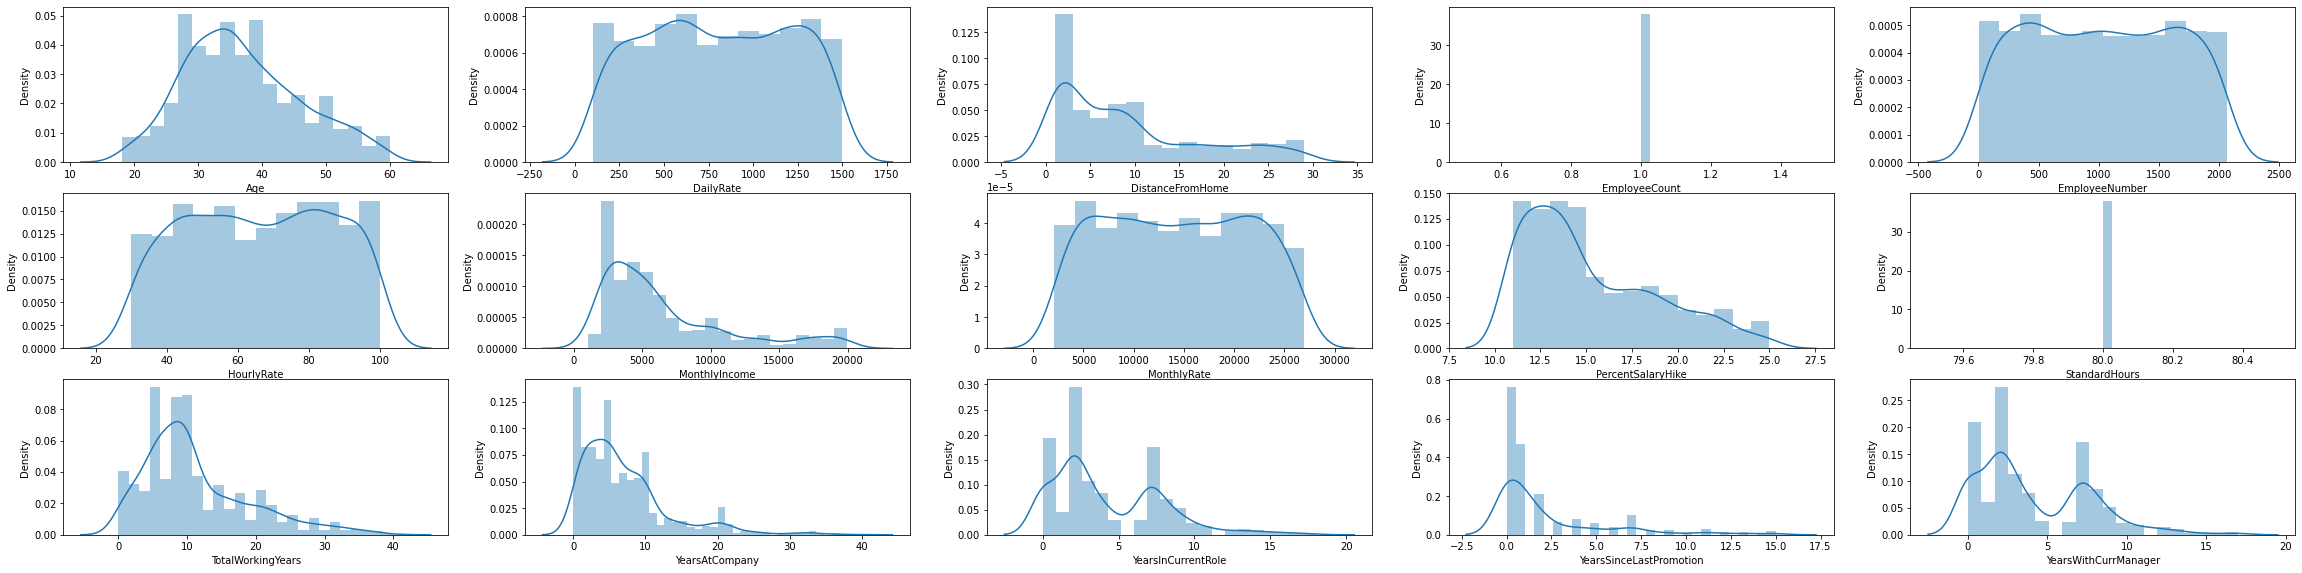

In [8]:
fig = plt.figure(1, figsize=(40, 20))
for i, col in enumerate(numeric_cols):
    fig.add_subplot(6, 5, i + 1)
    sns.distplot(ibm[col].dropna())
plt.show()
fig.savefig(f'../reports/ibm-distplots-{today}.png')

### Observations
- There are categorical attributes that are numerically represented, such as: 
    - Education: 1, 2, 3, 4, 5
    - Environment Satisfaction: 1, 2, 3, 4
    - Job Involvement: 1, 2, 3, 4
    - Job Level: 1, 2, 3, 4, 5
    - Job Satisfaction: 1, 2, 3, 4
    - Num Companies Worked: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
    - Performance Rating: 3, 4
    - Relationship Satisfaction: 1, 2, 3, 4
    - Stock Option Level: 0, 1, 2, 3
    - Training Times Last Year: 0, 1, 2, 3, 4, 5, 6
    - Work Life balance: 1, 2, 3, 4

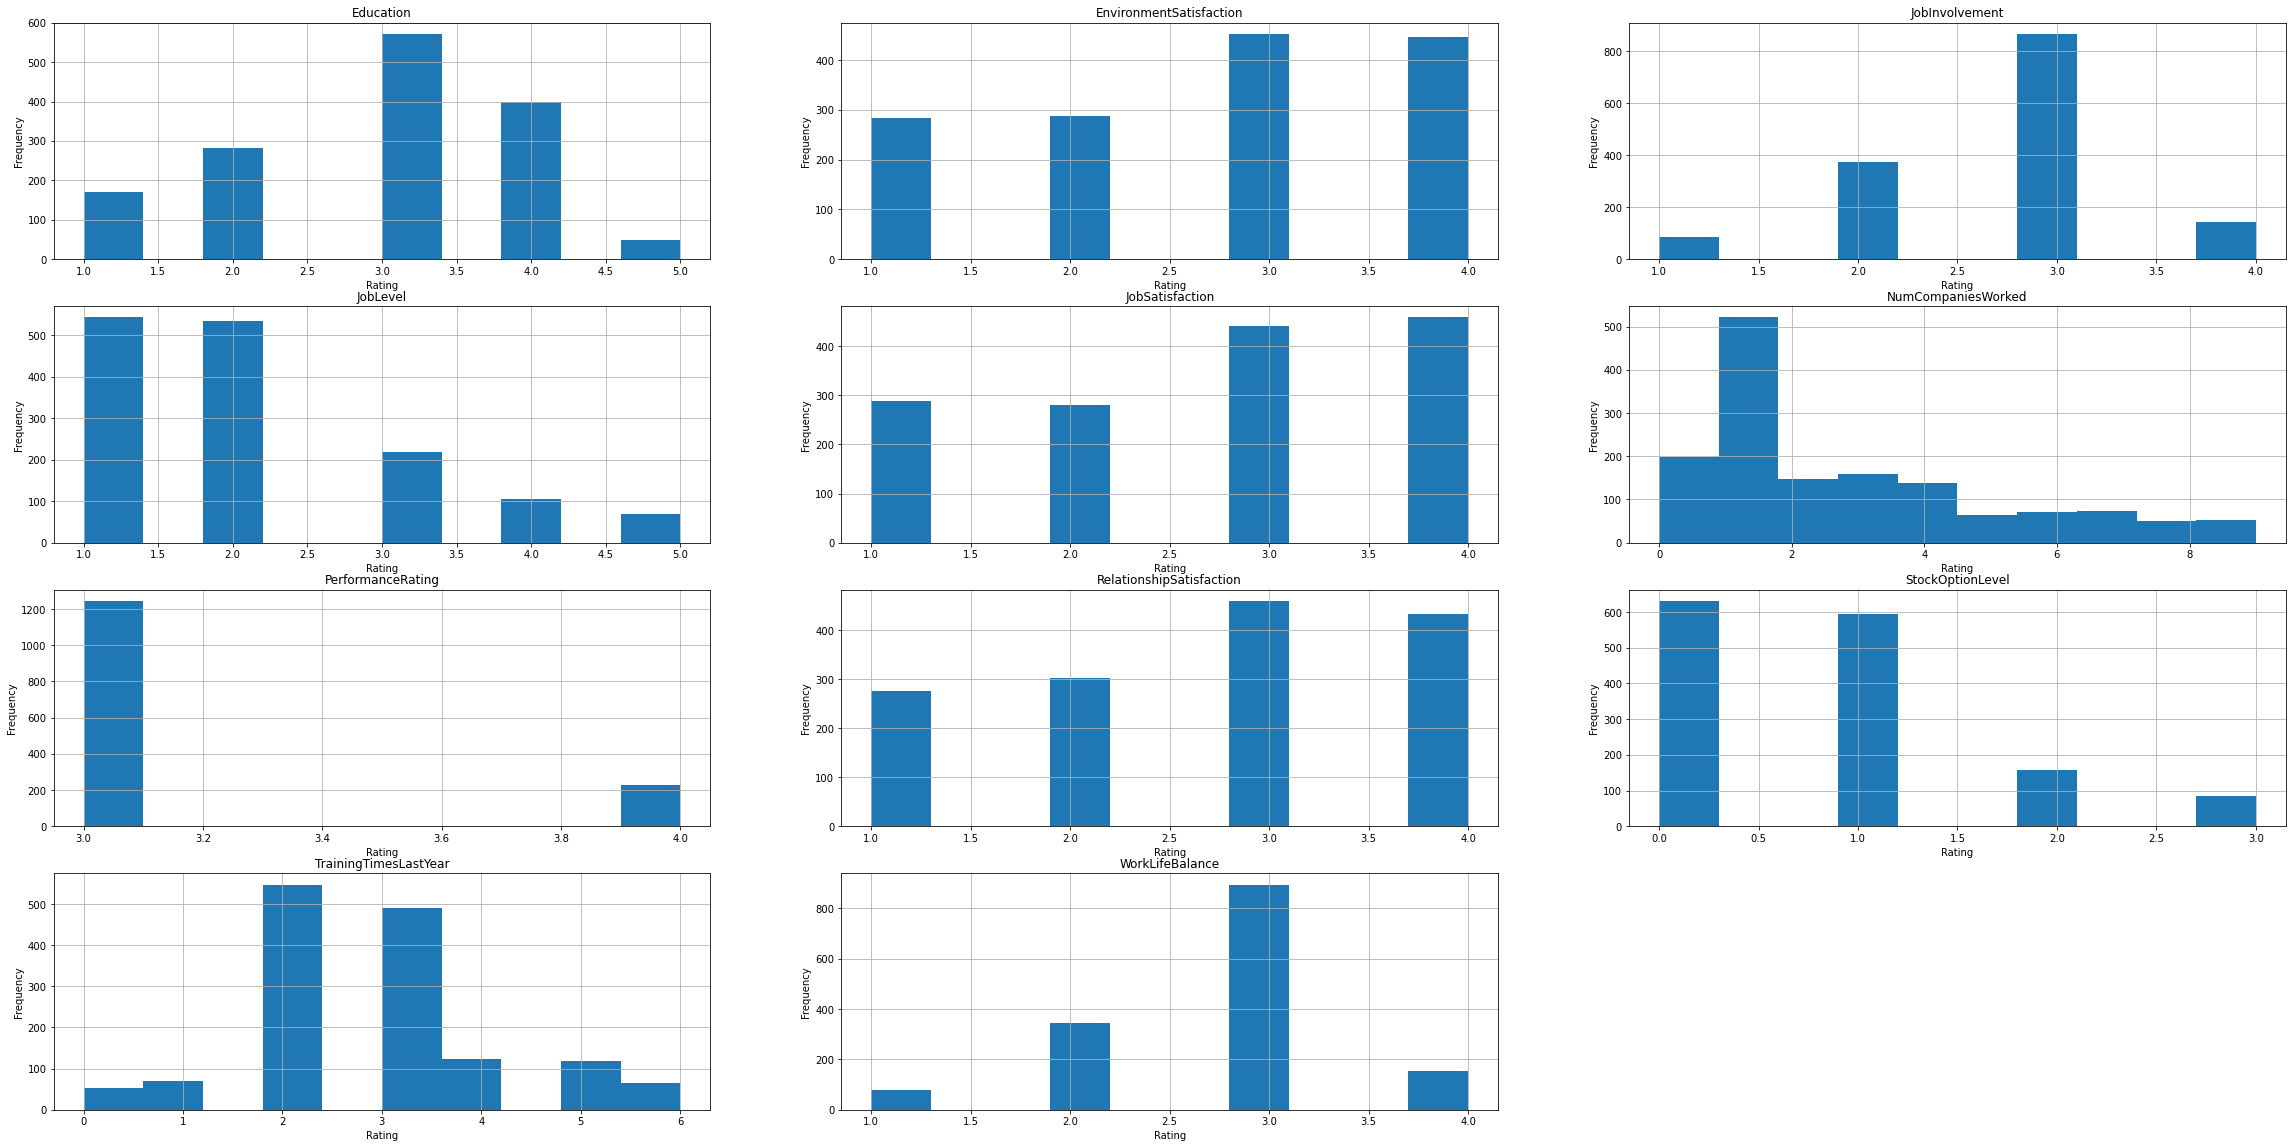

In [9]:
fig = plt.figure(1, figsize=(40, 20))
for i, col in enumerate(cat_num_cols):
    fig.add_subplot(4, 3, i+1)
    ibm[col].hist()
    plt.title(col)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
plt.show()
fig.savefig(f'../reports/ibm-numeric-categories-{today}.png')

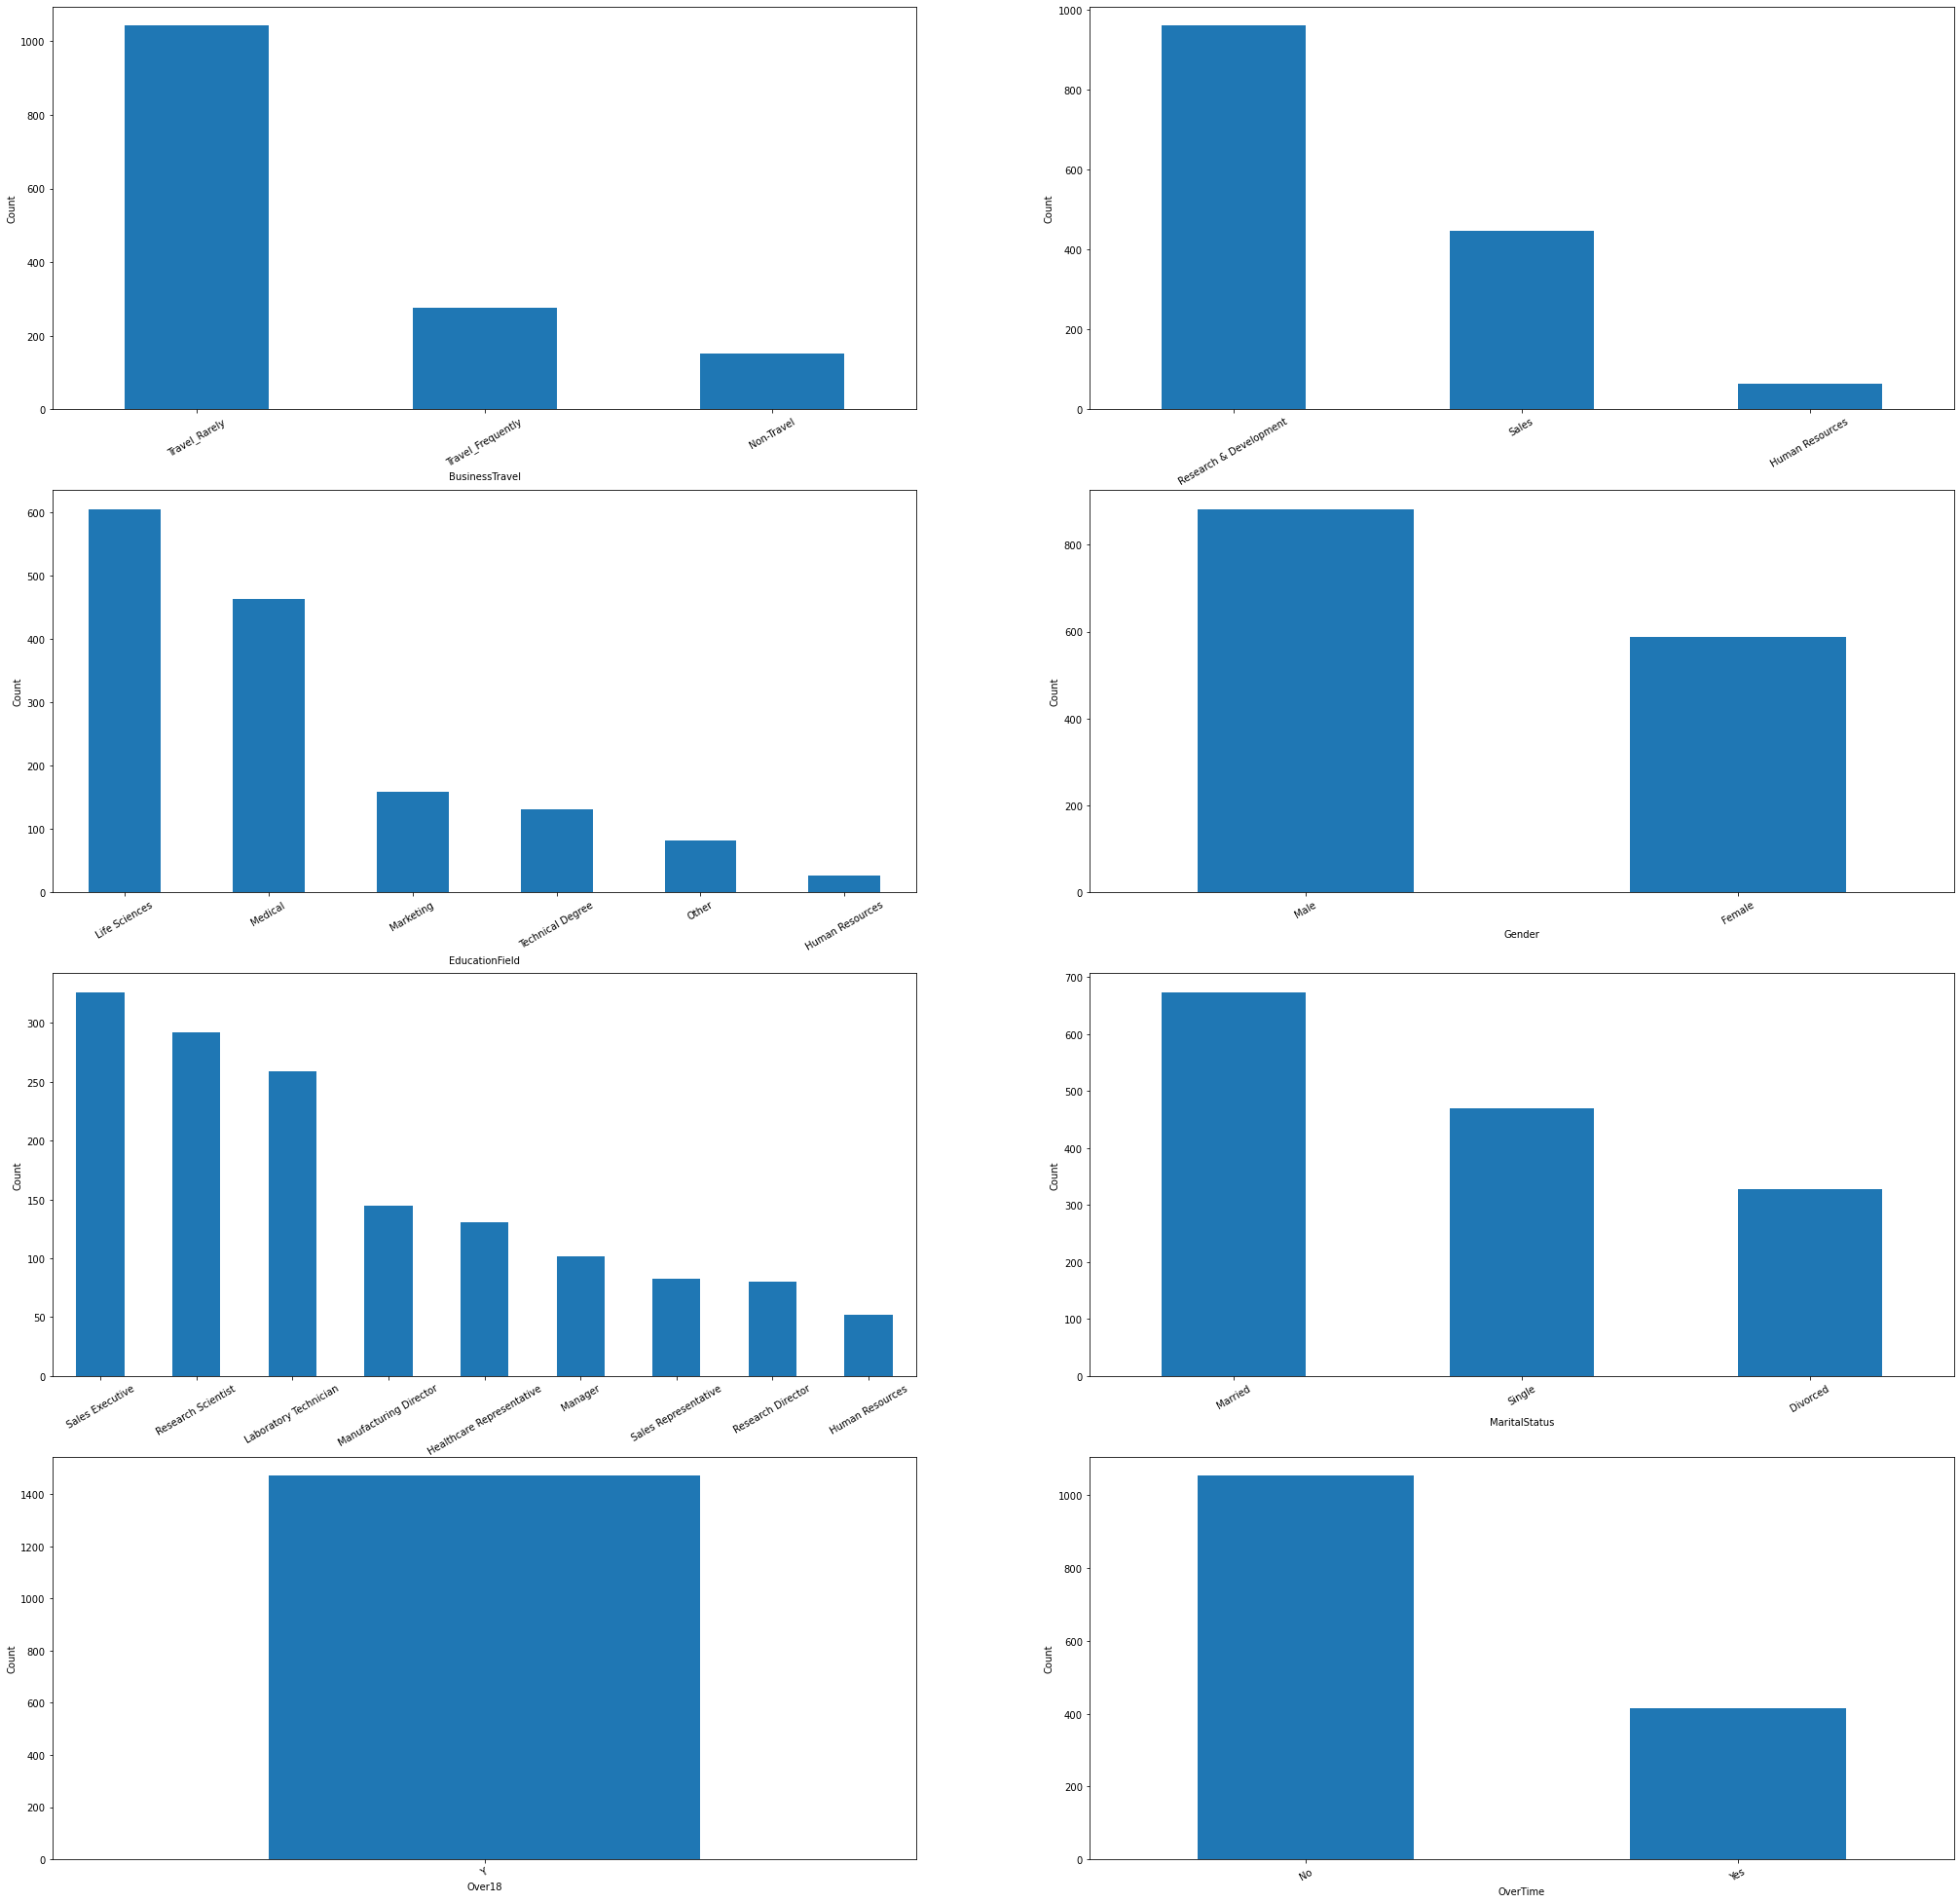

In [10]:
fig = plt.figure(1, figsize=(35, 35))
for i, col in enumerate(categoricals): 
    fig.add_subplot(4, 2, i+1)
    ibm[col].value_counts().plot(kind='bar')
    plt.xticks(rotation=30)
    plt.ylabel('Count')
    plt.xlabel(col)
plt.show()
fig.savefig(f'../reports/ibm-categorical-histograms-{today}.png')